# K-plus proches voisins (K-NN)

<img src="./figures/knn.jpg" width="700px"/>

## Diabetes Prediction

Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```


### Data Analysis
2. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```


3. Visualisez la répartition des valeurs de la variable `Outcome` à prédire:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```

### Model and Results
4. Instanciez et entraînez un **K-nearest neighbors** `KNeighborsClassifier` sur vos data:<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


5. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    


### Hyperparameter Tuning
7. Utilisez technique de **grid search** avec **cross validation** pour optimiser les hyperparamètres de votre K-NN.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    - Faites varier les nombre de voisins possibles de votre modèle parmi valeurs suivantes:<br>
    ```
    hyperparameters = {"n_neighbors" : range(1, 51, 2)}
    ```
    - Recalculez les prédictions sur le test set avec le meilleur modèle obtenu. Les résultats sont-il meilleurs?

## Libraries

In [14]:
#!pip install pandas
#!pip install scikit-learn

In [56]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [57]:
df = pd.read_csv('./data/diabetes.csv')

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.shape

(768, 9)

## Data Analysis

In [60]:
X = df.drop(["Outcome"], axis=1)

In [62]:
y = df["Outcome"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [66]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [73]:
X_train.isna().values.sum()

0

<AxesSubplot:>

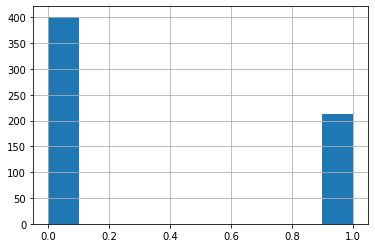

In [74]:
y_train.hist()

## Model and Results

## Hyperparameter Tuning